In [1]:
import pandas as pd
import os
import numpy as np

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Apply simple regularized regression models

In [2]:
path1 = os.path.join(os.getcwd(), "data", "data_train.csv")
path2 = os.path.join(os.getcwd(), "data", "data_test.csv")

train = pd.read_csv(path1)
test = pd.read_csv(path2)

In [3]:
train.shape

(334, 99)

In [4]:
test.shape

(10, 99)

In [5]:
train.head(2)

,S_0,S_1,S_2,S_3,S_4,S_5,S_6,S_7,S_8,S_9,...,S_89,S_90,S_91,S_92,S_93,S_94,S_95,S_96,S_97,price
0,1450.0,320.0,377.0,260.0,443.35,7.0,3100.0,5909.0,177.6,147.44,...,1994.6,2025.0,9185.48,9208.0,123.37,127.33,9501.3,24130.0,1660444.0,410.0
1,360.0,80.0,21.6,60.0,644.47,11.0,330.0,3302.0,29.5,29.93,...,284.1,346.1,1750.00,3739.0,24.05,16.21,1013.4,17881.5,428725.0,100.0


## Write a function regression and return each model's:
- alpha
- predictions: array
- coeefficients (dataframe):
    - for ridge and elastic net model, filter the abs(coef)>0.001
    - for lasso, coef!=0

In [6]:
def regression(data_train, data_test):
    # Splitting features and target
    X_train = data_train.drop('price', axis=1)
    y_train = data_train['price']
    X_test = data_test.drop('price', axis=1)

    # Initialize models with cross-validation
    ridge = RidgeCV(alphas=np.logspace(-4, -1, 4))
    lasso = LassoCV(alphas=np.logspace(-4, -1, 4))
    elastic_net = ElasticNetCV(alphas=np.logspace(-4, -1, 4), l1_ratio=np.arange(0.6, 1, 0.1))

    # Fit models
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    elastic_net.fit(X_train, y_train)

    # Make predictions and round them
    ridge_pred = np.round(ridge.predict(X_test), 2)
    lasso_pred = np.round(lasso.predict(X_test), 2)
    elastic_net_pred = np.round(elastic_net.predict(X_test), 2)

    # Prepare coefficients
    ridge_coef = pd.DataFrame({'variable': X_train.columns, 'coef': ridge.coef_}).query('abs(coef) > 0.001')
    lasso_coef = pd.DataFrame({'variable': X_train.columns, 'coef': lasso.coef_}).query('coef != 0')
    elastic_net_coef = pd.DataFrame({'variable': X_train.columns, 'coef': elastic_net.coef_}).query('abs(coef) > 0.001')

    # Prepare output dictionary
    result = {
        'ridge': {
            'alpha': ridge.alpha_,
            'pred': ridge_pred,
            'coefficients': ridge_coef
        },
        'lasso': {
            'alpha': lasso.alpha_,
            'pred': lasso_pred,
            'coefficients': lasso_coef
        },
        'elastic_net': {
            'alpha': elastic_net.alpha_,
            'l1_ratio': elastic_net.l1_ratio_,
            'pred': elastic_net_pred,
            'coefficients': elastic_net_coef
        }
    }

    return result


In [7]:
rlt = regression(data_train=train, data_test=test)

In [8]:
rlt.keys()

dict_keys(['ridge', 'lasso', 'elastic_net'])

## Visualize target price vs prediciton

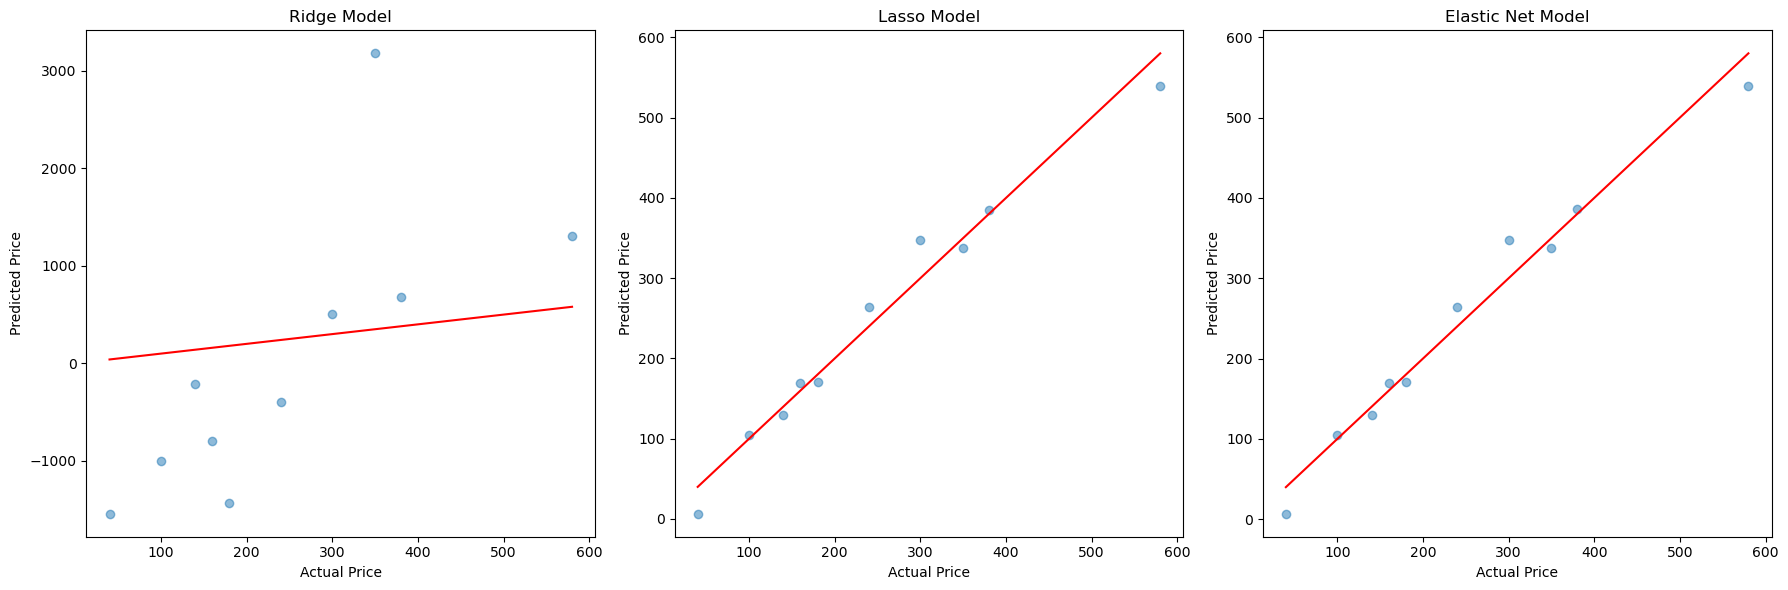

In [9]:
def plot_predictions_subplot(fig, position, actual, predicted, model_name):
    ax = fig.add_subplot(position)
    ax.scatter(actual, predicted, alpha=0.5)
    ax.set_title(f'{model_name} Model')
    ax.set_xlabel('Actual Price')
    ax.set_ylabel('Predicted Price')
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red')  # Diagonal line

# Create a figure
fig = plt.figure(figsize=(18, 6))

# Assuming regression_output is your function's output containing predictions
actual_prices = test['price']

# Plotting for each model in a separate subplot
plot_predictions_subplot(fig, 131, actual_prices, rlt['ridge']['pred'], 'Ridge')
plot_predictions_subplot(fig, 132, actual_prices, rlt['lasso']['pred'], 'Lasso')
plot_predictions_subplot(fig, 133, actual_prices, rlt['elastic_net']['pred'], 'Elastic Net')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()